# 3. Item Sets Data Analysis
* products.csv, aisles.csv, departments.csv, 총 3개의 Item에 대한 파일 분석

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
products = pd.read_csv("data/products.csv")
aisles = pd.read_csv("data/aisles.csv")
departments = pd.read_csv("data/departments.csv")
orders = pd.read_csv("data/orders.csv")
order_products_train = pd.read_csv("data/order_products__train.csv")

### Read Data

**1. products.csv**

In [3]:
print("The products size is : ", len(products))
products.head(5)

The products size is :  49688


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


**2. aisles.csv**

In [4]:
print("The aisles size is : ", len(aisles))
aisles.head(5)

The aisles size is :  134


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


**3. departments.csv**

In [5]:
print("The departments size is : ", len(departments))
departments.head(5)

The departments size is :  21


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


## 3-1) products 분포 분석을 위한 DataFrame 통합
* [products, aisles, departments]를 하나의 DataFrame으로 통합

In [6]:
items  = pd.merge(left =pd.merge(left=products, right=departments, how='left'), right=aisles, how='left')
items.head()

,product_id,product_name,aisle_id,department_id,department,aisle
0,1,Chocolate Sandwich Cookies,61,19,snacks,cookies cakes
1,2,All-Seasons Salt,104,13,pantry,spices seasonings
2,3,Robust Golden Unsweetened Oolong Tea,94,7,beverages,tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen,frozen meals
4,5,Green Chile Anytime Sauce,5,13,pantry,marinades meat preparation


## 3-2) departments 기준 products 분포

In [7]:
grouped = items.groupby("department")["product_id"].aggregate({'Total_products': 'count'}).reset_index()
grouped['Ratio'] = grouped["Total_products"].apply(lambda x: x /grouped['Total_products'].sum())
grouped.sort_values(by='Total_products', ascending=False, inplace=True)
grouped

/Users/Joohong/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  if __name__ == '__main__':


,department,Total_products,Ratio
17,personal care,6563,0.132084
20,snacks,6264,0.126067
16,pantry,5371,0.108095
3,beverages,4365,0.087848
10,frozen,4007,0.080643
7,dairy eggs,3449,0.069413
11,household,3085,0.062087
6,canned goods,2092,0.042103
9,dry goods pasta,1858,0.037393
19,produce,1684,0.033891


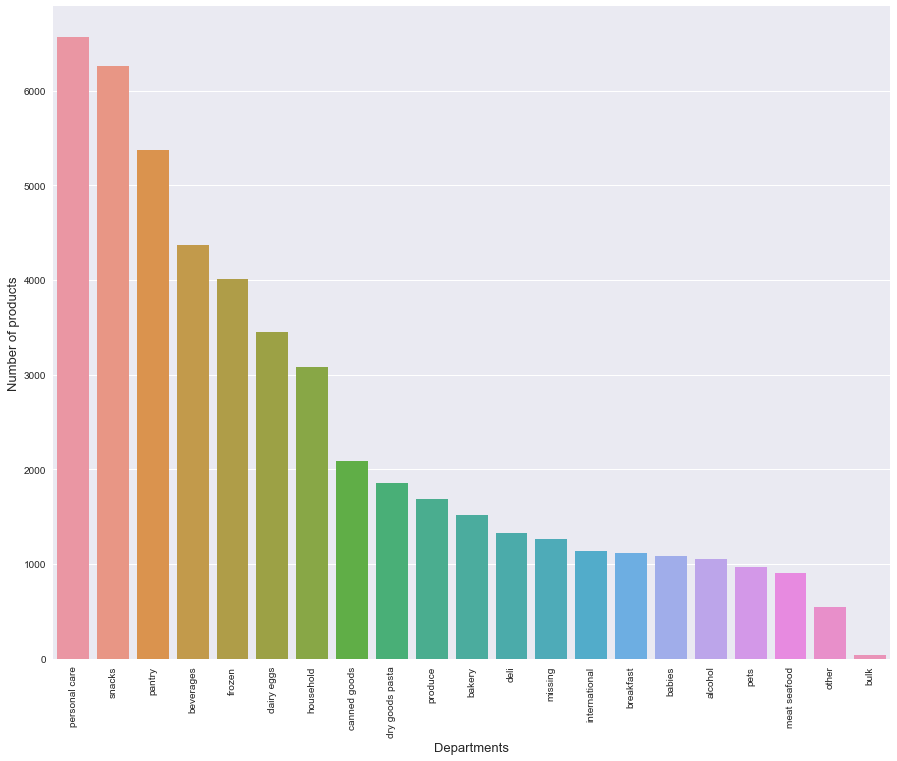

In [8]:
grouped  = grouped.groupby(['department']).sum()['Total_products'].sort_values(ascending=False)

sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='vertical')
sns.barplot(grouped.index, grouped.values)
plt.ylabel('Number of products', fontsize=13)
plt.xlabel('Departments', fontsize=13)
plt.show()

## 3-3) 각 departments 별, aisles 기준 products 분포
* departments의 개수인 21개의 aisles 기준 products 분포 차트를 보여줌.

/Users/Joohong/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  if __name__ == '__main__':


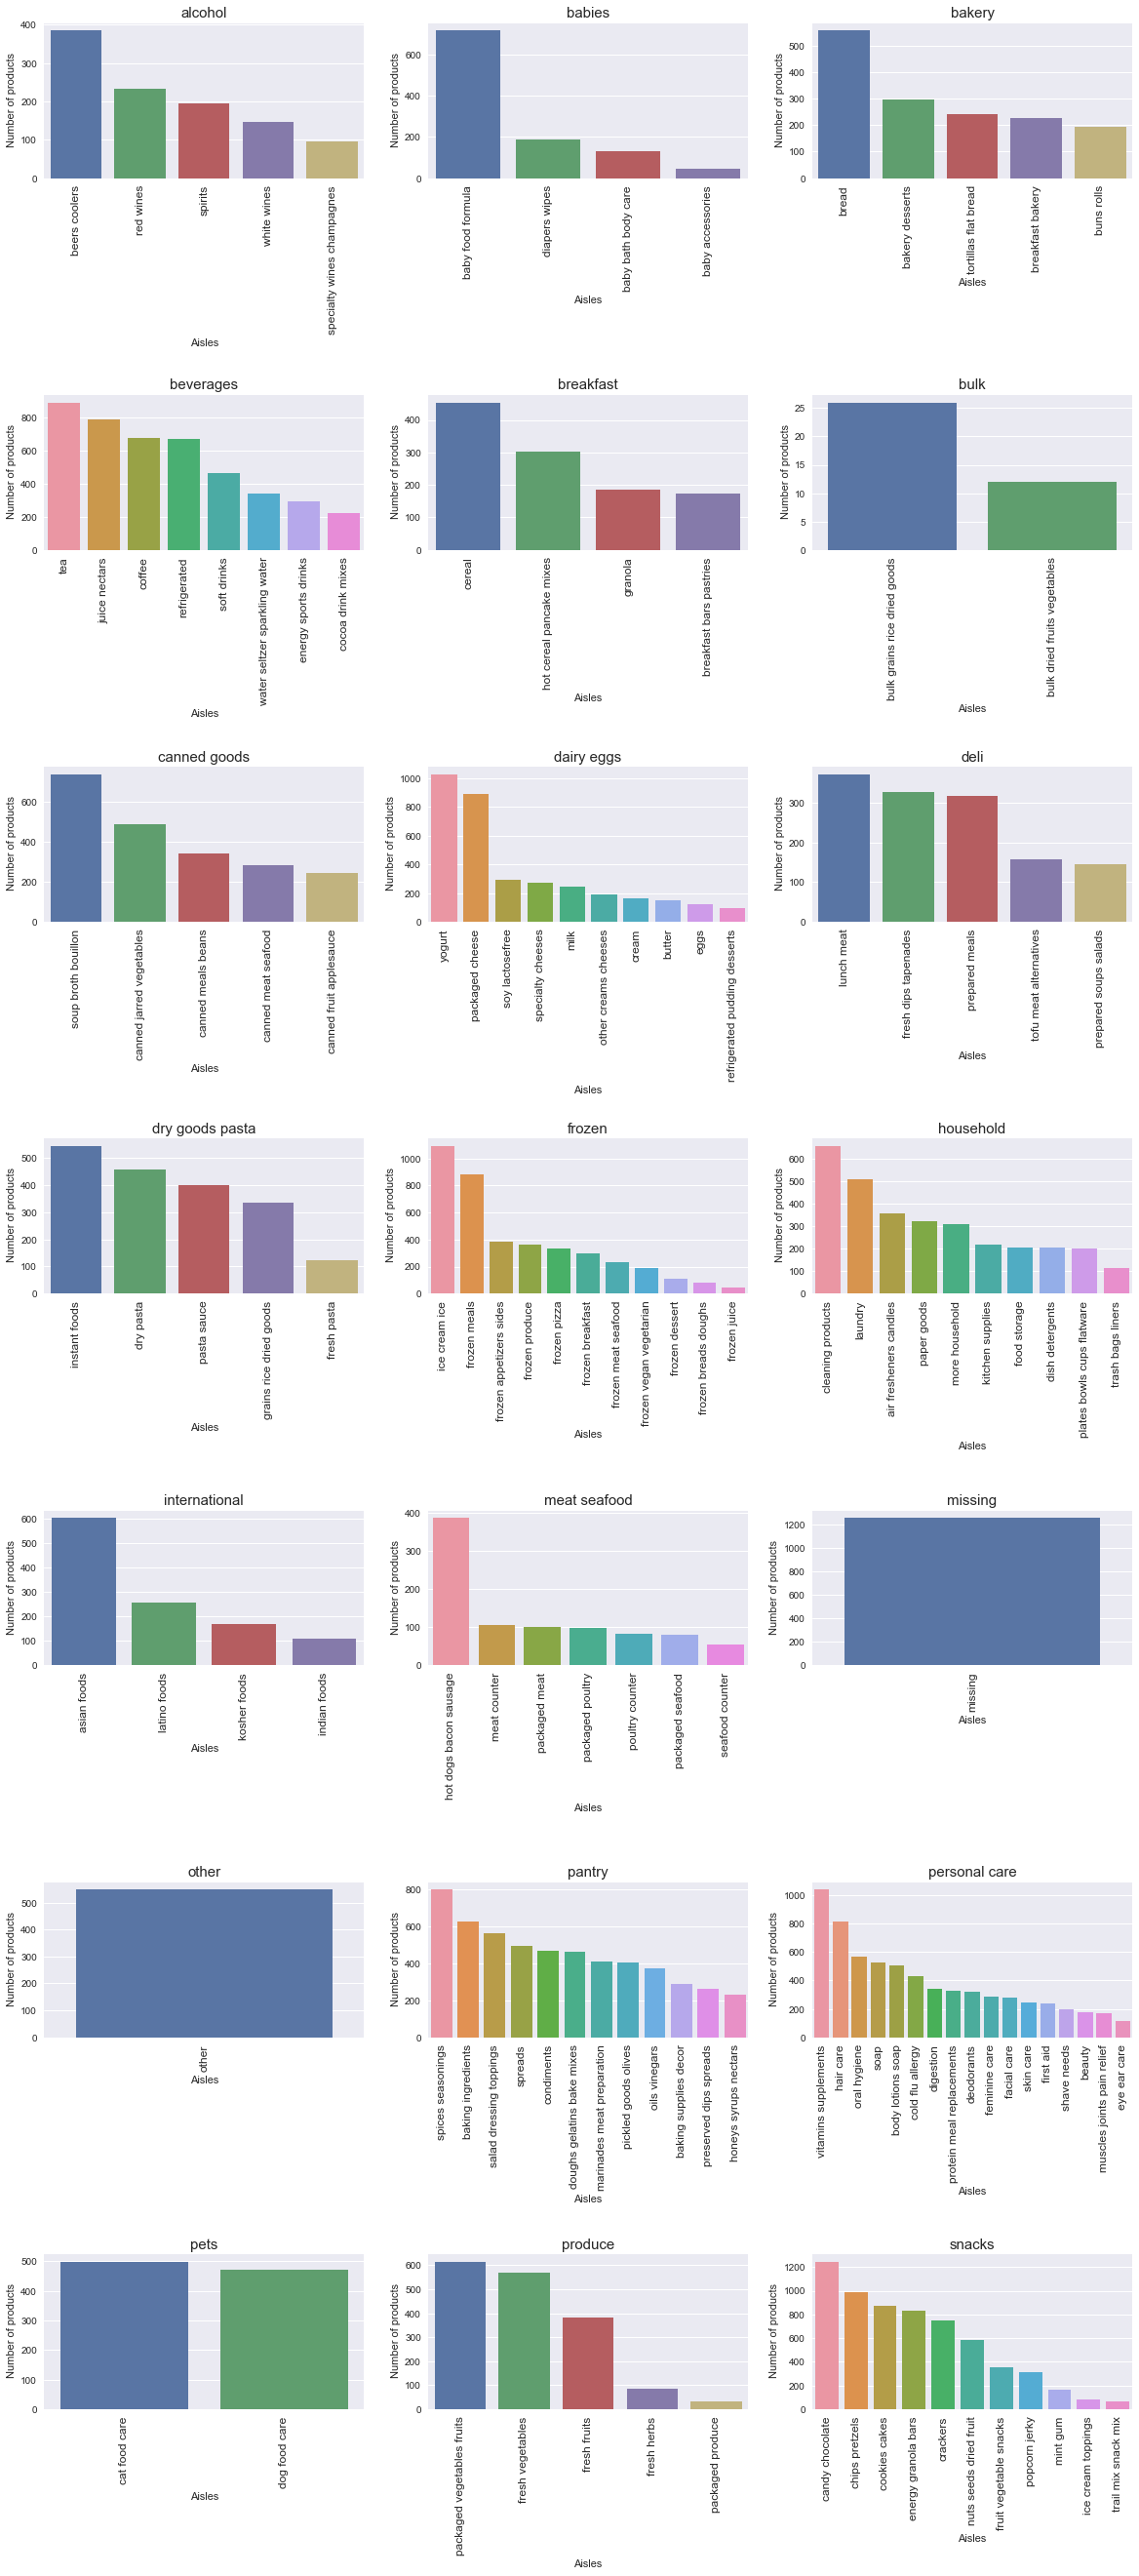

In [9]:
grouped = items.groupby(["department", "aisle"])["product_id"].aggregate({'Total_products': 'count'}).reset_index()
grouped.sort_values(by='Total_products', ascending=False, inplace=True)
fig, axes = plt.subplots(7,3, figsize=(20,45), gridspec_kw =  dict(hspace=1.4))
for (aisle, group), ax in zip(grouped.groupby(["department"]), axes.flatten()):
    g = sns.barplot(group.aisle, group.Total_products , ax=ax)
    ax.set(xlabel = "Aisles", ylabel=" Number of products")
    g.set_xticklabels(labels = group.aisle,rotation=90, fontsize=12)
    ax.set_title(aisle, fontsize=15)

## 3-4) 모든 aisles 기준 products 분포 (departments 무관)

In [10]:
grouped = items.groupby("aisle")["product_id"].aggregate({'Total_products': 'count'}).reset_index()
grouped['Ratio'] = grouped["Total_products"].apply(lambda x: x /grouped['Total_products'].sum())
grouped = grouped.sort_values(by='Total_products', ascending=False)
grouped[:20]

/Users/Joohong/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  if __name__ == '__main__':


,aisle,Total_products,Ratio
85,missing,1258,0.025318
18,candy chocolate,1246,0.025076
71,ice cream ice,1091,0.021957
130,vitamins supplements,1038,0.020890
133,yogurt,1026,0.020649
25,chips pretzels,989,0.019904
125,tea,894,0.017992
93,packaged cheese,891,0.017932
59,frozen meals,880,0.017711
31,cookies cakes,874,0.017590


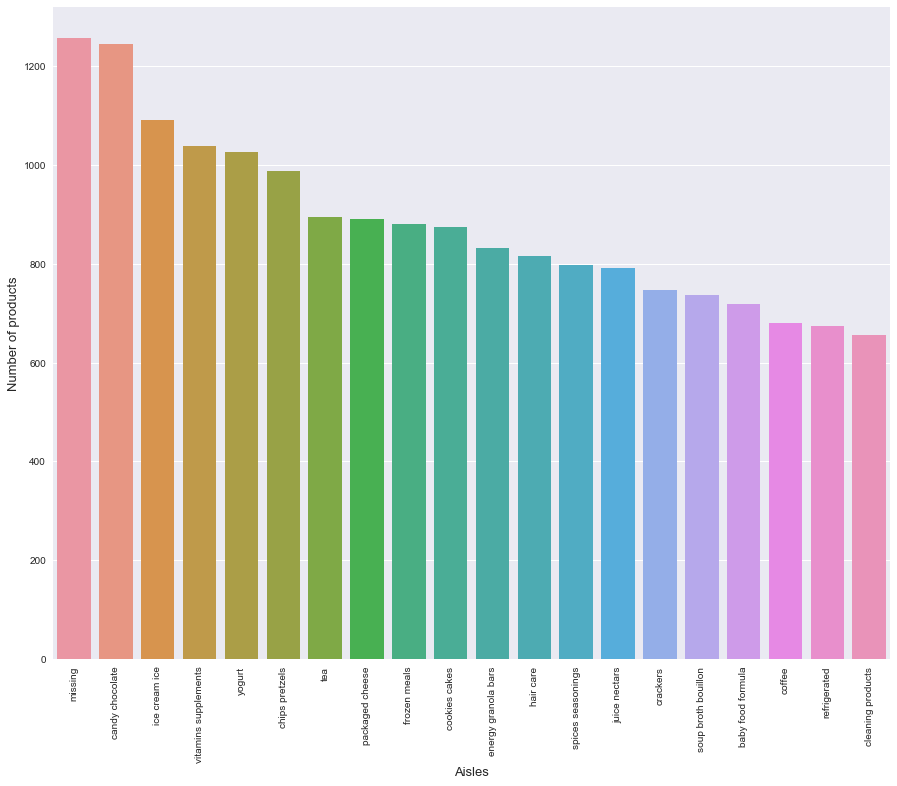

In [11]:
grouped  = grouped.groupby(['aisle']).sum()['Total_products'].sort_values(ascending=False)[:20]

f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='vertical')
sns.barplot(grouped.index, grouped.values)
plt.ylabel('Number of products', fontsize=13)
plt.xlabel('Aisles', fontsize=13)
plt.show()

## 3-5) 주문량 분포 분석을 위한 DataFrame 통합
* 제품(product_id+department+aisle)을 기준으로 하여 주문에 대한 정보(user_id, order_id)를 볼 수 있도록 함.
* Line 1 : orders와 order_products_train가 'order_id'를 key로 하여 inner join
* Line 2 : items와 위의 join결과가 'product_id'를 key로 하여 한 번 더 inner join

In [12]:
users_flow = orders[['user_id', 'order_id']].merge(order_products_train[['order_id', 'product_id']],
                                                   how='inner', left_on='order_id', right_on='order_id')

users_flow = users_flow.merge(items, how='inner', left_on='product_id',right_on='product_id')

users_flow

,user_id,order_id,product_id,product_name,aisle_id,department_id,department,aisle
0,1,1187899,196,Soda,77,7,beverages,soft drinks
1,67,2757217,196,Soda,77,7,beverages,soft drinks
2,676,632715,196,Soda,77,7,beverages,soft drinks
3,760,1167274,196,Soda,77,7,beverages,soft drinks
4,804,3347074,196,Soda,77,7,beverages,soft drinks
5,865,692135,196,Soda,77,7,beverages,soft drinks
6,992,3289231,196,Soda,77,7,beverages,soft drinks
7,1306,1269882,196,Soda,77,7,beverages,soft drinks
8,1512,1558696,196,Soda,77,7,beverages,soft drinks
9,1550,2005577,196,Soda,77,7,beverages,soft drinks


## 3-6) departments 기준 주문량(orders) 분포
* 많이 주문이 이루어진 departments는 무엇인가?

In [13]:
grouped = users_flow.groupby("department")["order_id"].aggregate({'Total_orders': 'count'}).reset_index()
grouped['Ratio'] = grouped["Total_orders"].apply(lambda x: x /grouped['Total_orders'].sum())
grouped.sort_values(by='Total_orders', ascending=False, inplace=True)
grouped

/Users/Joohong/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  if __name__ == '__main__':


,department,Total_orders,Ratio
19,produce,409087,0.295451
7,dairy eggs,217051,0.156759
20,snacks,118862,0.085845
3,beverages,114046,0.082366
10,frozen,100426,0.072530
16,pantry,81242,0.058675
2,bakery,48394,0.034951
6,canned goods,46799,0.033799
8,deli,44291,0.031988
9,dry goods pasta,38713,0.027959


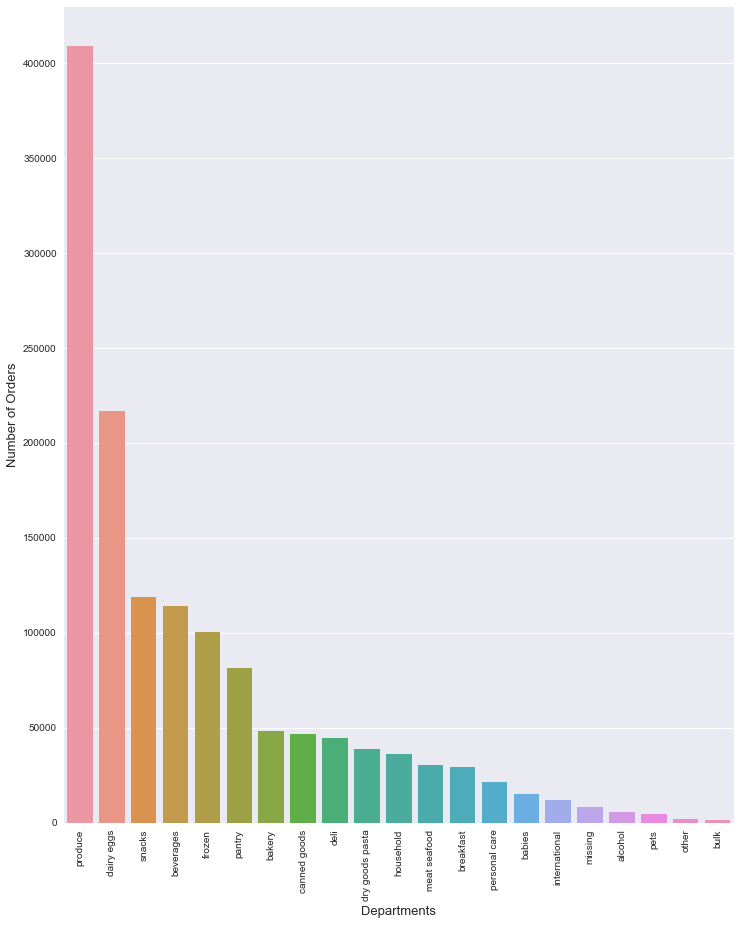

In [14]:
grouped  = grouped.groupby(['department']).sum()['Total_orders'].sort_values(ascending=False)

f, ax = plt.subplots(figsize=(12, 15))
plt.xticks(rotation='vertical')
sns.barplot(grouped.index, grouped.values)
plt.ylabel('Number of Orders', fontsize=13)
plt.xlabel('Departments', fontsize=13)
plt.show()

## 3-7) 각 departments 별, aisles 기준 주문량(orders) 분포

/Users/Joohong/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  if __name__ == '__main__':


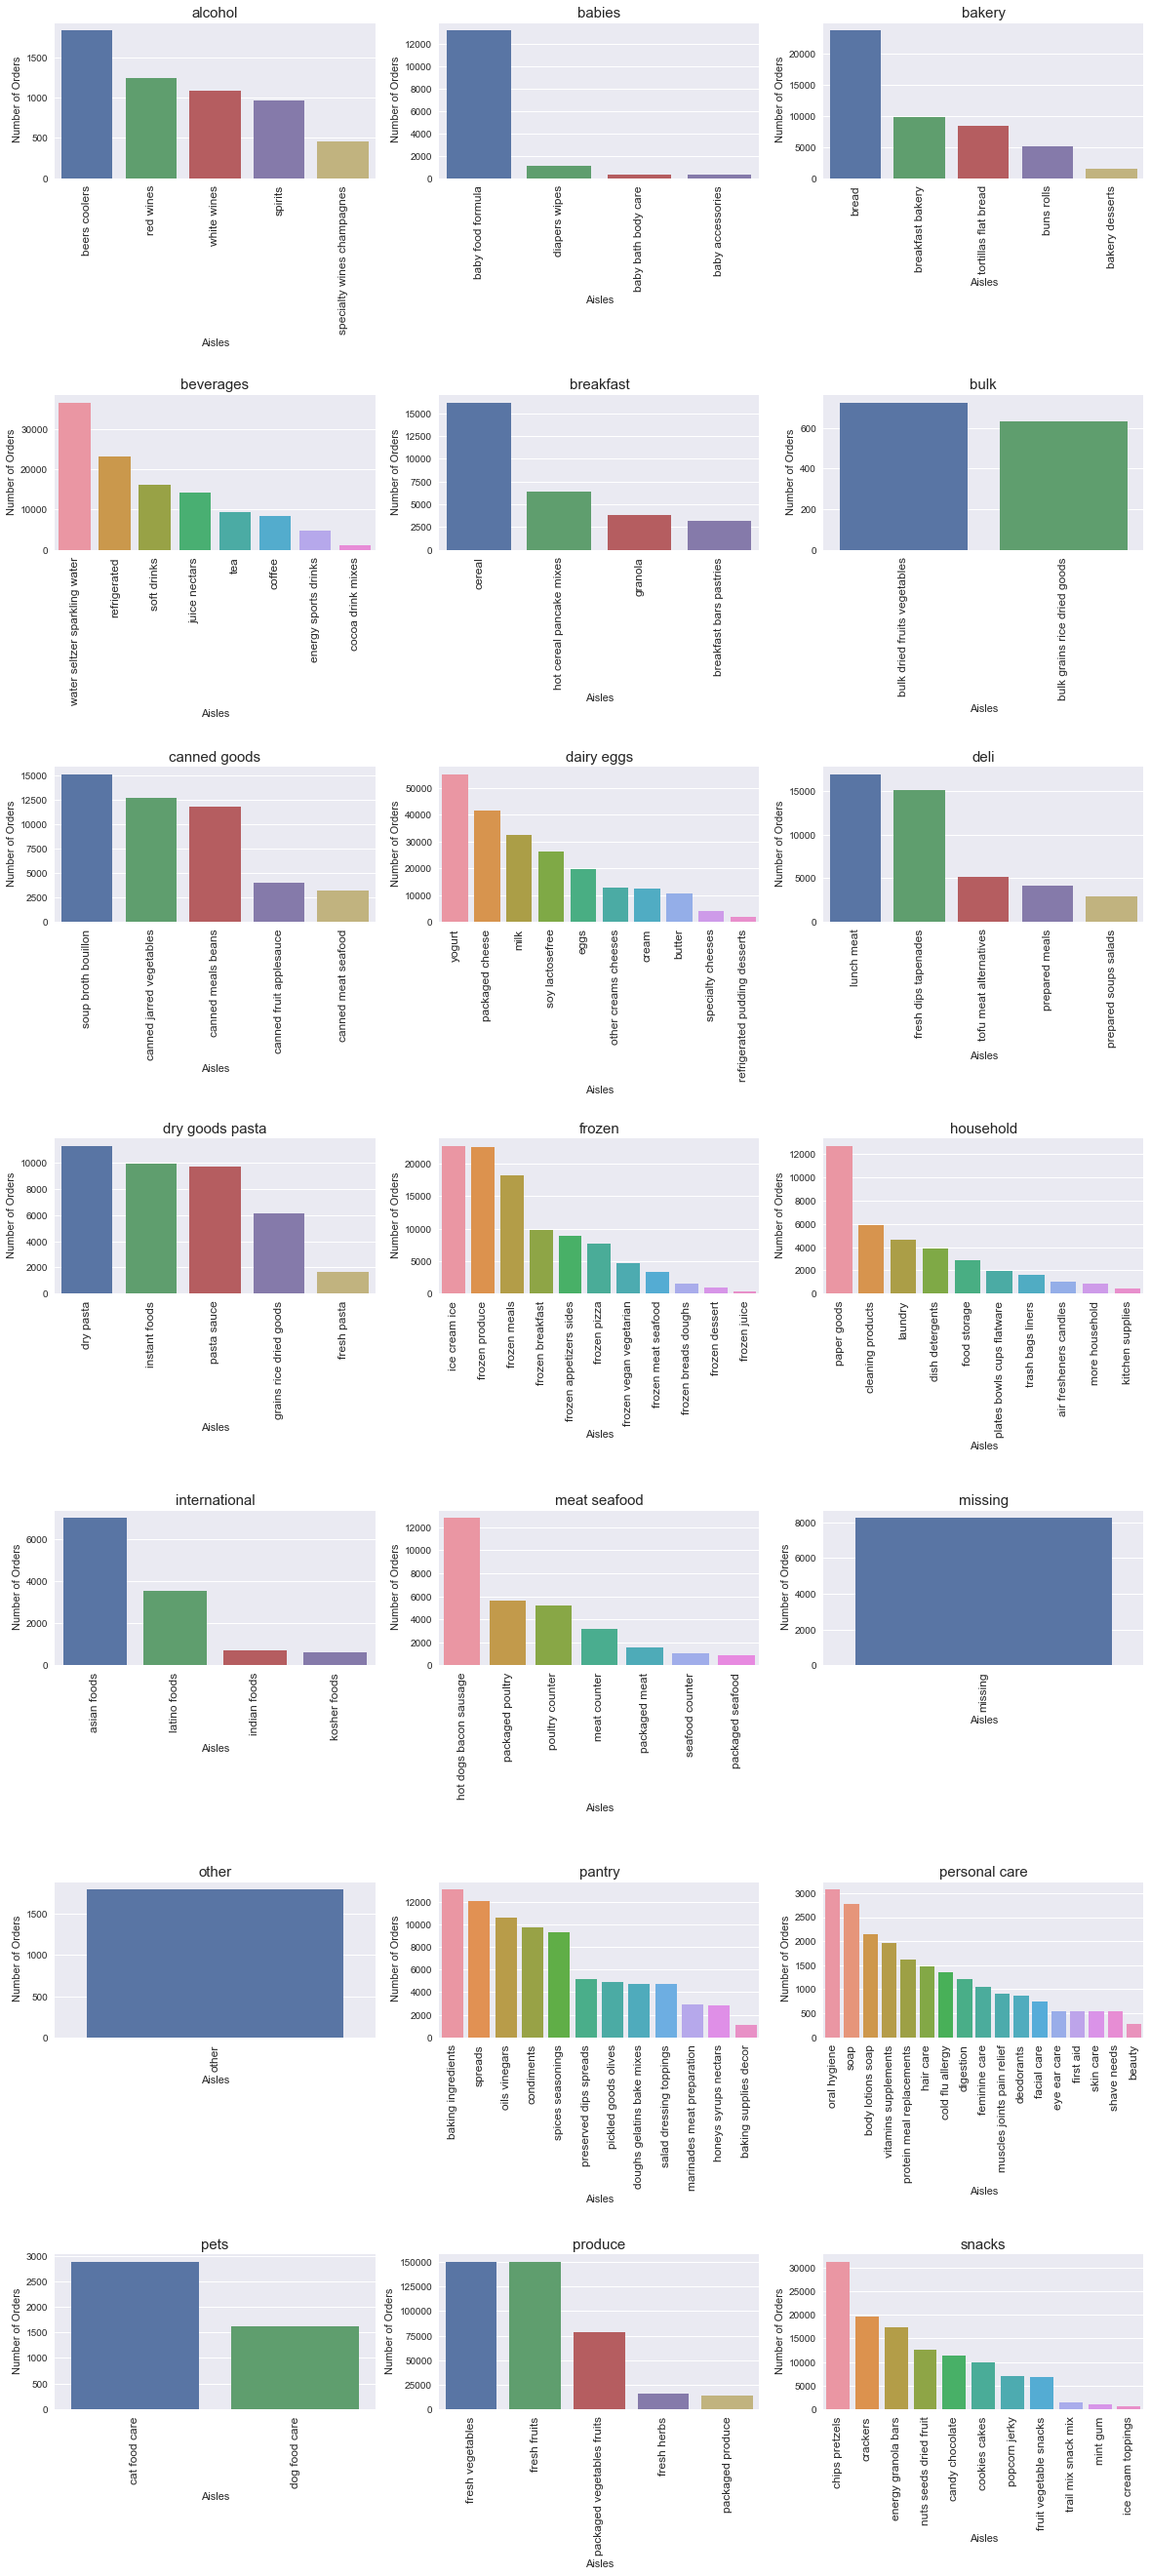

In [15]:
grouped = users_flow.groupby(["department", "aisle"])["order_id"].aggregate({'Total_orders': 'count'}).reset_index()
grouped.sort_values(by='Total_orders', ascending=False, inplace=True)
fig, axes = plt.subplots(7,3, figsize=(20,45), gridspec_kw =  dict(hspace=1.4))
for (aisle, group), ax in zip(grouped.groupby(["department"]), axes.flatten()):
    g = sns.barplot(group.aisle, group.Total_orders , ax=ax)
    ax.set(xlabel = "Aisles", ylabel=" Number of Orders")
    g.set_xticklabels(labels = group.aisle,rotation=90, fontsize=12)
    ax.set_title(aisle, fontsize=15)

## 3-8) 모든 aisles 기준 주문량(orders) 분포 (departments 무관)

In [16]:
grouped = users_flow.groupby("aisle")["order_id"].aggregate({'Total_orders': 'count'}).reset_index()
grouped['Ratio'] = grouped["Total_orders"].apply(lambda x: x /grouped['Total_orders'].sum())
grouped.sort_values(by='Total_orders', ascending=False, inplace=True )
grouped.head(10)

/Users/Joohong/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  if __name__ == '__main__':


,aisle,Total_orders,Ratio
53,fresh vegetables,150609,0.108773
50,fresh fruits,150473,0.108675
98,packaged vegetables fruits,78493,0.056689
133,yogurt,55240,0.039896
93,packaged cheese,41699,0.030116
131,water seltzer sparkling water,36617,0.026446
83,milk,32644,0.023576
25,chips pretzels,31269,0.022583
119,soy lactosefree,26240,0.018951
11,bread,23635,0.017070


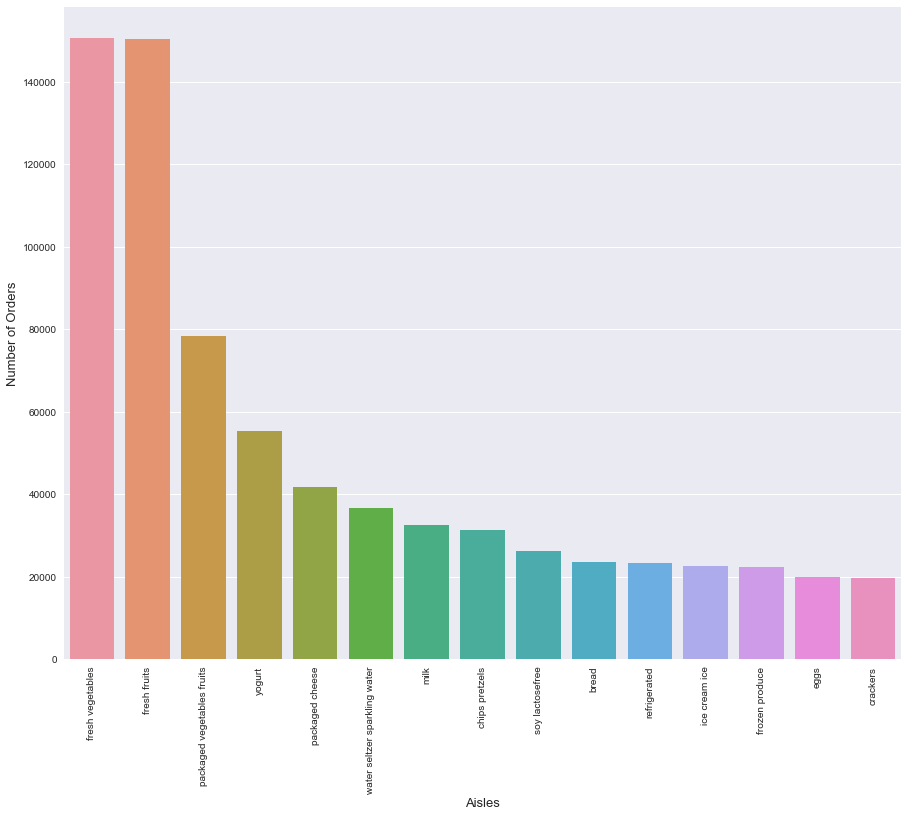

In [17]:
grouped  = grouped.groupby(['aisle']).sum()['Total_orders'].sort_values(ascending=False)[:15]

f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='vertical')
sns.barplot(grouped.index, grouped.values)
plt.ylabel('Number of Orders', fontsize=13)
plt.xlabel('Aisles', fontsize=13)
plt.show()